### LAB 01: Getting Started







### 1. Hãy tạo và huấn luyện một mạng no-ron theo cấu trúc sau trên tập MNIST (Tất cả các strides lớp Convolution dùng ở đây là [1,1])

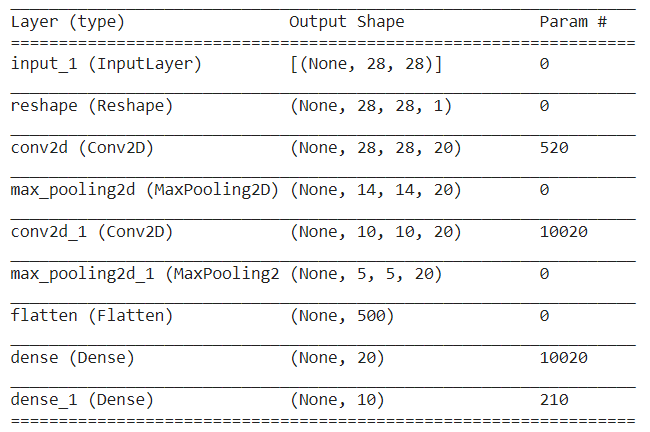



**Import thư viện**

In [ ]:
#import các thư viện 
import tensorflow as tf #thư viện tensorflow
import keras #Thư viện keras
import numpy as np #Thư viện numpy
import matplotlib.pyplot as plt #Thư viện matplotlib để vẽ đồ thị

In [ ]:
## tải MNIST dataset từ keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
##resacle ảnh thành ảnh thực trong đoạn [0,1]
X_train, X_test = X_train/255.0, X_test/255.0

In [ ]:
#Tách một phần tập train thành tập valid
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3) # Tách theo tỉ lệ validation/train=3/7

**Model**

In [ ]:
## Tạo layer input
inputs = keras.layers.Input(shape=(28,28))

## Reshape input
inputs_reshape = keras.layers.Reshape((28,28,1))(inputs)

## Model

conv = keras.layers.Convolution2D(filters=20,
                                 kernel_size=[5,5],
                                 strides=[1,1],
                                 padding='same',
                                 activation=tf.nn.relu)(inputs_reshape)

maxpool = keras.layers.MaxPool2D(pool_size=[2,2],
                                strides=[2,2])(conv)

conv2 = keras.layers.Convolution2D(filters=20,
                                 kernel_size=[5,5],
                                 strides=[1,1],
                                 padding='valid',
                                 activation=tf.nn.relu)(maxpool)

maxpool2 = keras.layers.MaxPool2D(pool_size=[2,2],
                                strides=[2,2])(conv2)


flatten = keras.layers.Flatten()(maxpool2)

dense = keras.layers.Dense(units=20, activation='softmax')(flatten)

dense2 = keras.layers.Dense(units=10, activation='softmax')(dense)

model = keras.models.Model(inputs=inputs, outputs=dense2)

## Compile model, 
model.compile(optimizer='adam',
             loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=["accuracy"])
    

## In toàn bộ cấu trúc của model
print("Cấu trúc của model: ")
model.summary()

Cấu trúc của model: 
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 20)        10020     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 20)          0         
_________________________________________________________________
flatten (Flatten)            (Non

**Training**

In [ ]:
history=model.fit(X_train,y_train,
                  epochs=100,
                  batch_size=200,
                  validation_data=(X_valid,y_valid))

## Lưu model thành một file
model.save_weights("first_model.h5")


## Load model
model.load_weights("first_model.h5")

## Đánh giá model trên tập test
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Loss trên tập test: ", test_loss," Accuracy trên tập test: ", test_acc)

Epoch 1/100
210/210 [==============================] - 1s 5ms/step - loss: 1.9049 - accuracy: 0.6245 - val_loss: 1.6661 - val_accuracy: 0.8299
Epoch 2/100
210/210 [==============================] - 1s 4ms/step - loss: 1.4947 - accuracy: 0.8603 - val_loss: 1.3385 - val_accuracy: 0.8759
Epoch 3/100
210/210 [==============================] - 1s 4ms/step - loss: 1.2106 - accuracy: 0.8714 - val_loss: 1.0893 - val_accuracy: 0.8783
Epoch 4/100
210/210 [==============================] - 1s 4ms/step - loss: 0.9859 - accuracy: 0.8816 - val_loss: 0.8965 - val_accuracy: 0.8802
Epoch 5/100
210/210 [==============================] - 1s 4ms/step - loss: 0.8144 - accuracy: 0.8851 - val_loss: 0.7494 - val_accuracy: 0.8811
Epoch 6/100
210/210 [==============================] - 1s 4ms/step - loss: 0.6809 - accuracy: 0.8860 - val_loss: 0.6368 - val_accuracy: 0.8834
Epoch 7/100
210/210 [==============================] - 1s 4ms/step - loss: 0.5776 - accuracy: 0.8885 - val_loss: 0.5464 - val_accuracy: 0.8853

 ### 2. Nêu cách tính các kết quả có trong Param # (Lưu ý Stride dùng ở đây đều là 1)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 20)        10020     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 20)          0         
_________________________________________________________________
flatten (Flatten)            (None, 500)              

In [ ]:
* input_1: Chỉ là input, không có gì để học nên số parameter = 0
* reshape: Thay đổi kích thước input, cũng không có gì để học nên số parameter = 0
* conv2d: Quá trình học bắt đầu. Số parameter = ((chiều dài filter * chiều rộng filter * số filter layer trước)+1)* số filter layer hiện tại) 
Vì kernel size là 5x5 => số parameter là ((5*5*1)+1)*20 = 520
* max_pooling2d: Đơn giản là chuyển những giá trị lớn nhất qua lớp tiếp theo, không có parameter để học nên số parameter = 0
* conv2d_1: Tương tự, vì kernel size là 5x5 => ((5*5*20)+1)*20 = 10020
* max_pooling2d_1: Giải thích tương tự max_pooling2d, số parameter = 0
* flatten: Layer này có tác dụng chuyển toàn bộ ma trận về 1 vector, không có parameter để học nên số parameter = 0
* dense: Số parameter = ((chiều dài vector mong muốn * chiều dài vector trước)+1*chiều dài vector mong muốn)
=> số parameter là (20*500)+1*20 = 10020
* dense_1: Tính tương tự. Số parameter là (20*10) + 1*10 = 210

Tổng số parameter là: 0 + 0 + 520 + 0 + 10020 + 0 + 0 + 10020 + 210 = 20770 

#Nộp Bài

*   Code và chạy kết quả lưu vào file notebook MHNC_TH1_MSSV.ipynb (notebook phải có kết quả chạy nếu ko xem như chưa làm)
*   Nén thành file MHNC_TH1_MSSV.rar (.zip) và nộp về: huynhthanh98vn@gmail.com
*   Deadline: 23g59 thứ 3 ngày 27/10/2020. Nộp trễ bị chia đôi số điểm.






